# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier


---

# Dataset Exploration 

## Step 0: Load The Data from a python pickle 

For every image there exists a corresponding answer, what kind of traffic sign this image represents. Udacity provided us with a preselected train, test and validation dataset so we do not have to think about, how to split the original dataset into meaningful subsets to each task.

Statistically seen all of our data is the population and we are taking samples of the population to estimate the correlation between features and classes. The problem is that the sample does not have to reflect the statistical correlations of features and classes as it is in the population. Learned patterns that fit the training set well may not be as strong when applied to the population. Thats why we need an independet test set to estimate the accuracy of the trained model on the whole population. When the patterns learned by the NN only work well on the training data it will not perform good on the popluation. This effect is called overfitting and is always a danger and has to be observed, when a NN is built and trained. We want that our classifier is good generalized so that it will apply to the population well.

## Training Dataset 
All images (features) used to train (FIT) parameters of the NN. The neurons are going to "learn" on this dataset, which image represents which class of the 43 traffic sign classes (target vector). At the end of each epoch, the result of the NN is going to be compared with the target vector using a cost function to determine the "correctness" of the NN guess. Then the weights and biases are adjusted using backpropagation in order to minimize the error between the NN guess and the target vector -> the correct answer -> using methods like gradient descend.

## Validation Dataset 
The validation set is a set of features and a target vector, which is used to prevent the network to overfit on the training data set. It is used to measure the actual error. The validation set can also "bleed" into the weights of the network, so it may overfit on the validation set too. That why we need a test data set.   

## Test Dataset 
This is an unbiased set of features and target vector used to evaluate the final model fit. It should be kept under disclosure till the model is fully trained and has to be independent from booth TRAINING and VALIDATION set. It is used to assess the performance of the network in terms of generalization and predictive power.

http://cseweb.ucsd.edu/~elkan/250Bwinter2011/classifiereval.pdf

https://stats.stackexchange.com/questions/19048/what-is-the-difference-between-test-set-and-validation-set

http://cs231n.github.io/neural-networks-3/

Activations insight: 
https://www.youtube.com/watch?v=GUtlrDbHhJM


## CS231 Winter Course 2016 

I highly recommend the Stanford University CS231n course on Convolutional Neural Networks for Visual Recognition:

http://cs231n.stanford.edu/ 

https://www.youtube.com/watch?v=g-PvXUjD6qg&list=PLlJy-eBtNFt6EuMxFYRiNRS07MCWN5UIA



Loading original data
[16  1 38 ...,  6  7 10]
Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43
Type = <class 'numpy.ndarray'>
Shape = (34799, 32, 32, 3)
Size = 106902528
MinValue 0
MaxValue 255
MeanValue 82.677589037
(32, 32, 3)


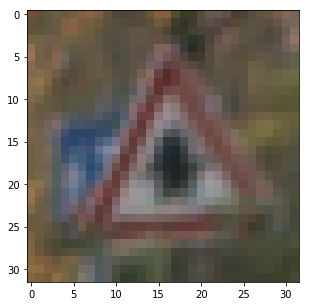

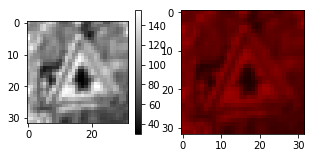

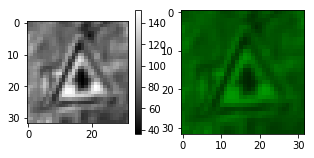

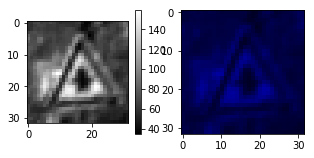

In [1]:
# Load pickled data
import pickle
import pprint 


# Loading data 

# Choose if data is already precalculated 
use_normalized = False 

if use_normalized:
    print("Loading normalized data")
    training_file = 'train_normalized.p'   # Training Set 
    testing_file= 'test_normalized.p'      # Test Set 
    validation_file = 'valid_normalized.p'
else:
    print("Loading original data")
    training_file = 'train.p'   # Training Set 
    testing_file= 'test.p'      # Test Set 
    validation_file = 'valid.p'

    
    
# Open and load the data 
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
#pp = pprint.PrettyPrinter()    
#pp.pprint(train)
    
# We have a list of features (images, 32x32x3 RGB) and a list of labels, where the Index of 
# a feature corresponds to the index of the label. Thus, the label list holds the type of 
# feature classification for eatch feature in the feature list. 
    
# Getting training data -> this data is used to train the CNN     
X_train = train['features'] 
y_train = train['labels']

# Getting validation data -> This data is used to validate 
X_validation = valid['features']
y_validation = valid['labels']

# Getting test set data 
X_test = test['features']
y_test = test['labels']


### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_validation)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = format(X_train[0].shape)

# TODO: How many unique classes/labels there are in the dataset.
print(y_test) # --> Labels of Classified test images --> One label more than once in the list 
# --> Need to get unique labels 
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.unique.html

n_classes = len(np.unique(y_test))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


##from sklearn.model_selection import train_test_split 
##X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
##print("Validation Set: {} samples".format(len(X_validation)))

#from sklearn.preprocessing import scale
#X = scale( X, axis=0, with_mean=True, with_std=True, copy=True )


### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline

print("Type =", type(X_train))
print("Shape =",X_train.shape)  # 4D Image set ... Number of images 
print("Size =",X_train.size) 
print("MinValue", X_train.min())
print("MaxValue", X_train.max())
print("MeanValue", X_train.mean())

# Randomply pic an entry 
index = random.randint(0, len(X_train))
#index = 100 
print (X_train[index].shape)  # --> List of features ... first index is the list index 

# Fooling around with the numpy structure to get the grip of it 
# Get the value of the pixel on the 10th row and 20th column
#X_train[index, 0, 31, 0] = 0
# Set to black the ten first lines
#X_train[index,:10, 0] = 0


# squeeze() - Remove single-dimensional entries from the shape of an array.
image = X_train[index].squeeze()
plt.figure(figsize=(5,5))
plt.imshow(image)

columns = 2
size_factor = 5

# Using Subplot on an array of images 
# https://stackoverflow.com/a/45280846
# image = array of images 

#plt.figure(figsize=(20,10))
#columns = 5
#for i, image in enumerate(images):
#    plt.subplot(len(images) / columns + 1, columns, i + 1)
#    plt.imshow(image)

# ---------- RED CHANNEL 
plt.figure(figsize=(size_factor,size_factor))
# This only extracts one channel --> intensities of red channel --> so I can only display a gray image  
red_channel = X_train[index,:,:,0].squeeze() 

plt.subplot(2 / columns + 1, columns, 0 + 1)
plt.imshow(red_channel, cmap=plt.cm.gray) # , cmap="hot"
plt.colorbar()

# Assuming I is numpy array with 3 channels in RGB order
I_red = X_train[index].copy()  # Duplicate image   ---> In order to make a deep copy of image I need to .copy()
I_red[:, :, 1] = 0    # Zero out contribution from green
I_red[:, :, 2] = 0    # Zero out contribution from blue

plt.subplot(2 / columns + 1, columns, 1 + 1)
plt.imshow(I_red)

# ---------- Green CHANNEL
plt.figure(figsize=(size_factor,size_factor))

green_channel = X_train[index,:,:,1].squeeze() 

plt.subplot(2 / columns + 1, columns, 0 + 1)
plt.imshow(green_channel, cmap=plt.cm.gray)
plt.colorbar()


# Assuming I is numpy array with 3 channels in RGB order
I_green = X_train[index].copy()  # Duplicate image
I_green[:, :, 0] = 0    # Zero out contribution from green
I_green[:, :, 2] = 0    # Zero out contribution from blue

plt.subplot(2 / columns + 1, columns, 1 + 1)
plt.imshow(I_green)

# ---------- Blue CHANNEL
plt.figure(figsize=(size_factor,size_factor))

blue_channel = X_train[index,:,:,2].squeeze() 

plt.subplot(2 / columns + 1, columns, 0 + 1)
plt.imshow(blue_channel, cmap=plt.cm.gray)
plt.colorbar()


# Assuming I is numpy array with 3 channels in RGB order
I_blue = X_train[index].copy()  # Duplicate image
I_blue[:, :, 0] = 0    # Zero out contribution from green
I_blue[:, :, 1] = 0    # Zero out contribution from blue

plt.subplot(2 / columns + 1, columns, 1 + 1)
plt.imshow(I_blue)

# Lets plot

## Exploratory Visualization
Maybe it would be interesting to know, how many samples of a traffic sign class are present in the training data. This could show us, if some of the traffic signs are underrepresented in the training set which may lead to biased classification results towards the strong classes. 

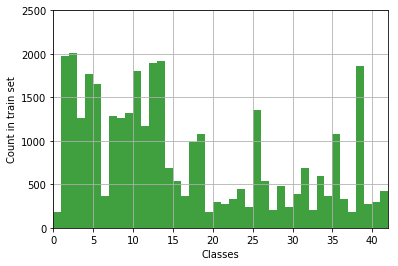

In [2]:
# Generate a Histogram with 43 bins 

# the histogram of the data
plt.hist(y_train, 42, normed=0, facecolor='green', alpha=0.75)

plt.xlabel('Classes')
plt.ylabel('Count in train set')
plt.axis([0, 42, 0, 2500])
plt.grid(True)

plt.show()

## Dataset Summary - What I have learned about my data

- My data comes as serialized python pickle data files
- The files contain
    - Training examples = 34799
    - Testing examples = 12630
    - Number of classes = 43 
- Images have following properties
    - Shape 32 x 32 x 3 
    - 3 Channels 
    - Color Format R G B 

- The data is organized as a 4D structure [feature_index,height,width,channels] 


List of features

[0] = [32,32,3] image

[1] = [32,32,3] image

[2] = [32,32,3] image

[3] = [32,32,3] image

 ...
 
[n] = [32,32,3] image

### Informations provided by Udacity 
The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**


### Data augmentation 

- The histogram of images per present classes show that some classes have more samples than other classes, which can lead to biased training results towards the strong classes 
- The database is not very large 
- It would be advisable to generate some augmented data to balance the image classes 
- Also mentioned in Lecture 11 of CS231 as very widely used approach to enhance the database 
- Large datasets are preprocessed image by image in the pipeline, we can preprocess our small dataset in advance because it does not use that much disk/memory space 

CS231n Winter 2016: Lecture 11: ConvNets in practice: 
https://youtu.be/pA4BsUK3oP4?t=321


#### Sidenote: What is a python pickle? 
A pickle is used for serializing and de-serializing a Python object structure. In our case it serializes our image data and classification list into a stream of characters. This character stream contains everything to reconstruct the objects in another python scripts, including the structures used (list, dict, etc.)

# Preprocessing of the data 

I choose only to zero mean the pixel values of the images between [-1,1]. This is proposed by the udacity and cs231 course.

I decided against grayscale convertion and further image processing because it does seem to work well with 3-channel images too according to the paper: http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf It states that converting to grayscale images immproved the accuracy from 98.97% to 99.17% which was a new record.

I am going to try to improve the test accuracy with further image processing if any time is left till submission.

I decided to follow the proposals made in the CS231 Course neural-networks-2: http://cs231n.github.io/neural-networks-2/

Following are citations from the course:

"In images is not as common to normalize data, because you don't have to separate different features that can be at different units everything is just pixels and they are bounded between 0 and 255 so it not as common to normalize the data, but it's common to zero center your data" - Andrej Karpathy https://youtu.be/gYpoJMlgyXA?t=2066

#### Comment on Center Image Data: 

"In images specifically whats common is just a mean centering and then a particular variant of mean centering that is slightly more convinient in practice. ..... If you want to center your data then for every single pixel you compute it's mean value over the TRAINING SET and you substract that out - so what you end up is this mean image with dimensions of 32x32x3 ... so you end up substracting that from every single image to center your data to have better training dynamics. And one other form that is slightly more convinient is substracting a per channel mean. So you go in red green blue channel and compute to the mean across all of space. so you just end up with basically three numbers of the means of the red green and blue channels ... This one is more convinient because you only have to care about those three numbers you dont have to worry about a giant array of mean image that you have to ship arround everywhere when you coding this up. ... Just basically substract the mean in CV applications things dont get much more complex than that " - Andrej Karpathy https://youtu.be/gYpoJMlgyXA?t=2120

#### Comment on Whitening / PCA on images: 

"The issue is you cant apply it on full images because your images are very high dimensional objects with lots of pixels - and so this covariance matrices will be huge. And people tried to do things like applying whitening only localy so you slide a whitening filter through your images spatially and that used to be done several years ago - but is not as common now - it doesnt seem to matter too much" - Andrej Karpaty https://youtu.be/gYpoJMlgyXA?t=2184

Following the proposal of <b>Lesson 6: Introduction to TensorFlow 23.Normalized Inputs and Initial Weights</b> I am going to substract 128 From each pixel value in each channel and divide it by 128. This is going to center the image data around 0 in an interval of [-1 and 1]. 

(255-128)/128 = 1 
(0-128) / 1228 = -1 
(128-128) / 128 = 0 


## Performing some experiments with the data 

Some experiments to get a grip of how to handle the data structures in python. How to do the operations - and / operate on data structures with multiple channels. Does it make a difference if I pool out each channel independently or can I perform these operations on the whole data structure at once?


-------------- udacity per channel calculation -------------------


Image statistic all three channels
mean  43.8818359375
std  24.5435154213


Image statistic Channel R
mean  47.5390625
std  23.728905877


Image statistic Channel R - after op
mean  -6.93889390391e-18
std  1.0


Image statistic Channel G
mean  42.814453125
std  24.2588729356


Image statistic Channel G - after op
mean  -2.77555756156e-17
std  1.0


Image statistic Channel B
mean  41.2919921875
std  25.1868349466


Image statistic Channel B - after op
mean  -1.38777878078e-17
std  1.0


Image statistic all three channels after each channel handled seperately - UDACITY PROPOSAL
mean  -1.85037170771e-17
std  1.0
--------------- All channels at once ------------------

Udacity proposal after op on three channels: 
mean  -0.657173156738
std  0.191746214229
--------------cs231 Per Channel calculation -------------------


Image statistic all three channels
mean  43.8818359375
std  24.5435154213


Image statistic Channel R
m

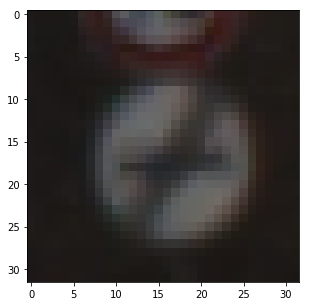

In [3]:
import math
import matplotlib.mlab as mlab

# As proposed by udacity course 
# Changing interval to -1 - 1 
#image_prepro_udacity = X_train[0,0:2,0:2].copy().astype(float)

print("-------------- udacity per channel calculation -------------------")

index = 0
plt.figure(figsize=(size_factor,size_factor))
plt.imshow(X_train[index])
image_prepro_udacity_channel_wise = X_train[index].copy().astype(float)
image_prepro_udacity_one_step = X_train[index].copy().astype(float)


mean = np.mean(image_prepro_udacity_channel_wise)
standard_dev = np.std(image_prepro_udacity_channel_wise)
print("\n\nImage statistic all three channels")
print("mean ", mean)
print("std ", standard_dev)

################# R 

mean = np.mean(image_prepro_udacity_channel_wise[:,:,0])
standard_dev = np.std(image_prepro_udacity_channel_wise[:,:,0])

print("\n\nImage statistic Channel R")
print("mean ", mean)
print("std ", standard_dev)

image_prepro_udacity_channel_wise[:,:,0] = image_prepro_udacity_channel_wise[:,:,0] - mean
image_prepro_udacity_channel_wise[:,:,0] /= standard_dev 

mean = np.mean(image_prepro_udacity_channel_wise[:,:,0])
standard_dev = np.std(image_prepro_udacity_channel_wise[:,:,0])

print("\n\nImage statistic Channel R - after op")
print("mean ", mean)
print("std ", standard_dev)

################# G 

mean = np.mean(image_prepro_udacity_channel_wise[:,:,1])
standard_dev = np.std(image_prepro_udacity_channel_wise[:,:,1])

print("\n\nImage statistic Channel G")
print("mean ", mean)
print("std ", standard_dev)

image_prepro_udacity_channel_wise[:,:,1] = image_prepro_udacity_channel_wise[:,:,1] - mean
image_prepro_udacity_channel_wise[:,:,1] /= standard_dev 

mean = np.mean(image_prepro_udacity_channel_wise[:,:,1])
standard_dev = np.std(image_prepro_udacity_channel_wise[:,:,1])

print("\n\nImage statistic Channel G - after op")
print("mean ", mean)
print("std ", standard_dev)

################# B

mean = np.mean(image_prepro_udacity_channel_wise[:,:,2])
standard_dev = np.std(image_prepro_udacity_channel_wise[:,:,2])

print("\n\nImage statistic Channel B")
print("mean ", mean)
print("std ", standard_dev)

image_prepro_udacity_channel_wise[:,:,2] = image_prepro_udacity_channel_wise[:,:,2] - mean
image_prepro_udacity_channel_wise[:,:,2] /= standard_dev 

mean = np.mean(image_prepro_udacity_channel_wise[:,:,2])
standard_dev = np.std(image_prepro_udacity_channel_wise[:,:,2])

print("\n\nImage statistic Channel B - after op")
print("mean ", mean)
print("std ", standard_dev)

mean = np.mean(image_prepro_udacity_channel_wise)
standard_dev = np.std(image_prepro_udacity_channel_wise)
print("\n\nImage statistic all three channels after each channel handled seperately - UDACITY PROPOSAL")
print("mean ", mean)
print("std ", standard_dev)

print("--------------- All channels at once ------------------")

# Udacity Proposal
image_prepro_udacity_one_step -= 128 
#print("\n\nUdacity proposal -128: " , image_prepro_udacity)

image_prepro_udacity_one_step = image_prepro_udacity_one_step/128
#print("Udacity proposal /128: " , image_prepro_udacity)

mean = np.mean(image_prepro_udacity_one_step)
standard_dev = np.std(image_prepro_udacity_one_step)
print("\nUdacity proposal after op on three channels: ")
print("mean ", mean)
print("std ", standard_dev)


######################################################################################

print("--------------cs231 Per Channel calculation -------------------")

# CS231 Proposal 
#image_prepro_cs231 = X_train[0,0:2,0:2].copy().astype(float)
image_prepro_cs231 = X_train[0].copy().astype(float)
image_prepro_cs231_one_step = X_train[0].copy().astype(float)

mean = np.mean(image_prepro_cs231)
standard_dev = np.std(image_prepro_cs231)
print("\n\nImage statistic all three channels")
print("mean ", mean)
print("std ", standard_dev)

################# R 

mean = np.mean(image_prepro_cs231[:,:,0])
standard_dev = np.std(image_prepro_cs231[:,:,0])

print("\n\nImage statistic Channel R")
print("mean ", mean)
print("std ", standard_dev)

image_prepro_cs231[:,:,0] = image_prepro_cs231[:,:,0] - mean
image_prepro_cs231[:,:,0] /= standard_dev 

mean = np.mean(image_prepro_cs231[:,:,0])
standard_dev = np.std(image_prepro_cs231[:,:,0])

print("\n\nImage statistic Channel R - after op")
print("mean ", mean)
print("std ", standard_dev)

################# G

mean = np.mean(image_prepro_cs231[:,:,1])
standard_dev = np.std(image_prepro_cs231[:,:,1])

print("\n\nImage statistic Channel G")
print("mean ", mean)
print("std ", standard_dev)

image_prepro_cs231[:,:,1] = image_prepro_cs231[:,:,1] - mean
image_prepro_cs231[:,:,1] /= standard_dev 

mean = np.mean(image_prepro_cs231[:,:,1])
standard_dev = np.std(image_prepro_cs231[:,:,1])

print("\n\nImage statistic Channel G - after op")
print("mean ", mean)
print("std ", standard_dev)

################# G

mean = np.mean(image_prepro_cs231[:,:,2])
standard_dev = np.std(image_prepro_cs231[:,:,2])

print("\nImage statistic Channel B")
print("mean ", mean)
print("std ", standard_dev)

image_prepro_cs231[:,:,2] = image_prepro_cs231[:,:,2] - mean
image_prepro_cs231[:,:,2] /= standard_dev 

mean = np.mean(image_prepro_cs231[:,:,2])
standard_dev = np.std(image_prepro_cs231[:,:,2])

print("\nImage statistic Channel B - after op")
print("mean ", mean)
print("std ", standard_dev)


mean = np.mean(image_prepro_cs231)
standard_dev = np.std(image_prepro_cs231)
print("\n\nImage statistic all three channels after each channel handled seperately - CS231 PROPOSAL")
print("mean ", mean)
print("std ", standard_dev)

print("--------------- All channels at once ------------------")


mean =  np.mean(image_prepro_cs231_one_step)
standard_dev =  np.std(image_prepro_cs231_one_step)

print("\ncs231 proposal image statistic all three channels: ")
print("mean ", mean)
print("std ", standard_dev)

image_prepro_cs231_one_step = image_prepro_cs231_one_step - mean
image_prepro_cs231_one_step /= standard_dev 

mean =  np.mean(image_prepro_cs231_one_step)
standard_dev =  np.std(image_prepro_cs231_one_step)

print("\nImage statistic all channels at once")
print("mean ", mean)
print("std ", standard_dev)




## Proposed data normalization methods 

### Udacity CS231 proposed preprocessing 
The proposal of Udacity maps the image interval [0,255] to the interval of [-1, 1] using

a + ((val-data_min)*(b-a)) / (data_max - data_min)

Where data_min = 0, data_max = 255, a = -1 and b = 1 then the equation simplifies to: 

For 255:  <br>
-1 + ((255 - 0)*(1-(-1)) / 255)<br>
-1 + ((255)*2)/255<br>
-1 + 510 / 255 <br>
-1 + 2 = 1 <br><br>

For 0: <br> 
-1 + ((0 - 0)*(1-(-1)) / 255)<br>
-1 + ((0)*2)/255<br>
-1 + 0 / 255 <br>
-1 + 0 = -1 <br><br>

For 128:  
-1 + ((128 - 0)*(1-(-1)) / 255)<br>
-1 + ((128)*2)/255<br>
-1 +  256 / 255 <br>
-1 + ~1 = 0 <br><br>

Image statistic all three channels after each channel handled seperately - UDACITY PROPOSAL

<b>mean  -1.85037170771e-17

std  1.0</b>


### CS231 proposed preprocessing 

Whereas the CS231 proposal is actually calculating the mean of each channel, substacting it from each pixel value and dividing each pixel by the standard deviation.  

Image statistic all three channels after each channel handled seperately - CS231 PROPOSAL

<b>mean  -1.85037170771e-17

std  1.0</b>


### Conclusion 

- The two proposals are equivalent 
- I think it does matter that each channel is normalized separately so I am going to zero mean each channel independetly 

## Defining a normalization function based on my findings 


In [4]:

# Normalizing images per channel - using mean and stddev like proposed 
# in http://cs231n.github.io/neural-networks-2/  
def normalize_images(image):

    ################# R 

    image_float = image.copy().astype(float)
    
    mean = np.mean(image_float[:,:,0])
    standard_dev = np.std(image_float[:,:,0])

    image_float[:,:,0] = image_float[:,:,0] - mean
    image_float[:,:,0] /= standard_dev 
    
    ################# G

    mean = np.mean(image_float[:,:,1])
    standard_dev = np.std(image_float[:,:,1])

    image_float[:,:,1] = image_float[:,:,1] - mean
    image_float[:,:,1] /= standard_dev 

    ################# G

    mean = np.mean(image_float[:,:,2])
    standard_dev = np.std(image_float[:,:,2])

    image_float[:,:,2] = image_float[:,:,2] - mean
    image_float[:,:,2] /= standard_dev 

    return image_float


X_train_normalized = [None]*n_train
X_validation_normalized = [None]*n_validation
X_test_normalized = [None]*n_test

for i in range(n_train):
    img=X_train[i]
    X_train_normalized[i] = normalize_images(img)
    
for i in range(n_validation):
    img=X_validation[i]
    X_validation_normalized[i] =normalize_images(img)
    
for i in range(n_test):
    img=X_test[i]
    X_test_normalized[i] =normalize_images(img)
    
    
print("All images normalized!")

All images normalized!


In [5]:
print("Checking sizes of normalized data arrays")
print("len X_train", len(X_train))
print("len X_train_normalized", len(X_train_normalized))

print("len X_validation", len(X_validation))
print("len X_validation_normalized", len(X_validation_normalized))

print("len X_test", len(X_test))
print("len X_test_normalized", len(X_test_normalized))


# In python these are pointer
# So I set pointer of my training data to point on 
# the newly created datasets 

X_train = X_train_normalized
X_validation = X_validation_normalized

Checking sizes of normalized data arrays
len X_train 34799
len X_train_normalized 34799
len X_validation 4410
len X_validation_normalized 4410
len X_test 12630
len X_test_normalized 12630


# Model Architecture

I chose to start my experiments using the adapted LeNet5 architecture built in Udacity course as a basis. Some of the code is therefore from Udacity LeNet Lab https://github.com/udacity/CarND-LeNet-Lab/blob/master/LeNet-Lab-Solution.ipynb as suggested to start. I reshaped input layer and first convolutional layer so that it accepts a 32x32x3.

As suggested by Udacity I followed the paper of Pierre Sermanent and Yann LeCun "Traffic Sign Recognition with Multi-Scale Convolutional Networks" to build a new architecture. The main finding of this paper is that incorporating branched out data from Stage 1 (skipping Stage 2) into the final classifier improves the classification results.

The paper states that the resulting accuracy using grayscale images is only slightly better than using color channel images, so I skipped this step. Also they added augmented data to the database to further improve accuracy, which I also had to skip. (mostly because of the lack of time).

The spatial filter sizes are mostly equivalent to the LeNet network but they are deeper. I found that this is a good way to go.

http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf

## Evaluation and visualization 

I am using tensorboard to visualize the CNN architecture I built as a graph to verify everything is connected properly. It also enables me to see how my accuracy, loss, weights and biases are developing during the training - though I would like to have more information about how to interpret these values.


## Architecture 1: LeNet 

Layer 1: Convolutional with activation 
- Input:  32x32x3 
- Output: 28x28x6
- Activation RELU 

Pooling Activations of Layer 1: 
- Input:  28x28x6 
- Output: 14x14x6.

Layer 2: Convolutional with activation 
- Input:  14x14x6
- Output: 10x10x16
- Actovatopm: RELU 

Pooling Activations of Layer 2: 
- Input:  10x10x16 
- Output: 5x5x16

Flatten
- Input:   5x5x16
- Output:  400

Layer 3: Fully connected with activation 
- Input:   400
- Output:  120
- Activation: RELU

Layer 4: Fully connected with activation 
- Input:   120
- Output:  84
- Activation: RELU

Layer 5: Fully connected with activation 
- Input:   84
- Output:  43
- Activation: RELU


### Tensorboard graph 

Following picture shows the tensorboard graph resulted from my architecture. 

![Architecture of modified LeNet](./LeNet_tensorboard_visualization_3channel.png)



## LeCunNet 

Layer 1: Convolutional with activation 
- Input:  32x32x3 
- Output: 28x28x16
- Activation RELU 

Pooling Activations of Layer 1: 
- Input:  28x28x16 
- Output: 14x14x16.

Layer 2: Convolutional with activation 
- Input:  14x14x16
- Output: 10x10x32
- Actovatopm: RELU 

Pooling Activations of Layer 2: 
- Input:  10x10x32 
- Output: 5x5x32

Flattened Pooled Layer 2 activations: 
- Input:  5x5x32
- Output: 800 

Repool Pooled Layer 1 activations: 
- Input: 10x10x32 
- Output: 3x3x16

Flatten Repooled Layer 1 activation: 
- Input:   3x3x16
- Output:  144

Concat flattened pooled Layer 2 and flattened repooled Layer 1 
- Input: 144 & 800 
- Output: 944

Layer 3: Fully connected with activation 
- Input:   944
- Output:  472
- Activation: RELU

Layer 4: Fully connected with activation 
- Input:   472
- Output:  43


### Tensorboard graph 

![Architecture of modified LeNet](./LeCunNet_tensorboard_visualization_2stage.png)


In [6]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)


## Implementing architectures and layer functions 

In [7]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten



# For truncated normal initialization of weights 
mu = 0
sigma = 0.01

use_dropout = True


def convolution_layer(input_data, 
                      filter_size_height, 
                      filter_size_width, 
                      input_depth, 
                      output_depth, 
                      strides=1,
                      padding_type = 'VALID',
                      layer_name="convolution_layer",
                      use_dropout = True):
    with tf.name_scope(layer_name): #Setting up named scopes which cause all groups of related ops to have the same namning structure
        
        # Randomly initialize filter weights with truncated_normal --> mean = 0, sigma = 0.1 
        # With filter shape [height, width, input_depth, output_depth]
        w = tf.Variable(tf.truncated_normal(shape=(filter_size_height, 
                                                   filter_size_width, 
                                                   input_depth, 
                                                   output_depth), mean = mu, stddev = sigma), name ="W")
        
     
    
        b = tf.Variable(tf.constant(0.1, shape=[output_depth]),name = "b")
        # Apply convolution 
        convolution = tf.nn.conv2d(input_data, w, strides=[1, strides, strides, 1], padding = padding_type, name = layer_name)
        
        # Applyl dropout 
        #if use_dropout == True: 
        #    activation = tf.nn.dropout(activation, keep_prob)
        
        # Add bias 
        convolution = tf.nn.bias_add(convolution, b)
        
        # Apply Activation funciton 
        activation = tf.nn.relu(convolution)
        
        # Collecting summary of weights, biases and activations 
        tf.summary.histogram("weights",w)
        tf.summary.histogram("biases",b)
        tf.summary.histogram("activations",activation)
        return activation

def maxpool2d(_x, _k_size, _strides, _padding_type = 'VALID'):
    return tf.nn.max_pool(
        _x,
        ksize=_k_size,
        strides=_strides,
        padding=_padding_type)

def avgpool2d(_x, _k_size, _strides, _padding_type = 'VALID'):
    return tf.nn.max_pool(
        _x,
        ksize=_k_size,
        strides=_strides,
        padding=_padding_type)

def fully_connected_layer(input_data,
                          input_depth,
                          output_depht,
                          name="fully_connected_layer"):
    with tf.name_scope(name):
        #Randomly initialize filter weights with truncated_normal --> mean = 0, sigma = 0.1 
        w  = tf.Variable(tf.truncated_normal(shape=(input_depth, output_depht), mean = mu, stddev = sigma), name="W")
        
        b = tf.Variable(tf.constant(0.1, shape=[output_depht]),name = "b")
        
        fully_connected_logits = tf.add(tf.matmul(input_data, w), b)
        
        # Collecting summary of weights, biases and activations 
        tf.summary.histogram("weights",w)
        tf.summary.histogram("biases",b)
        return fully_connected_logits

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
   
    
    # -----------------------L1 CONV + ACTIVATION -----------------------------------------------------------------------------
    # Input = 32x32x1. Output = 28x28x6.

    # Defining Convolution filter for Layer1: Input -> L1 -> L1_out -> L1_activ
    L1_filter_size_width = 5 # Filter height 
    L1_filter_size_height = 5 # Filter width 
    L1_input_depth = 3 # Input Depth/Channels   ---> TO MATCH RGB INPUT 
    L1_k_output_depth = 6 # Output Depth/Channels 
    L1_strides = 1 # Filter stride --> shift of the patch/kernel/filter over the input image 
    L1_padding = 'VALID'
    
    
    L1_convolution_out = convolution_layer(x, 
                                           L1_filter_size_height,
                                           L1_filter_size_width, 
                                           L1_input_depth,
                                           L1_k_output_depth, 
                                           L1_strides,
                                           L1_padding,
                                           "ConvL1")

    # --------------------- L1 POOLING -------------------------------------------------------------------------------
    # Input = 28x28x6. Output = 14x14x6.
      
    L1_pooling_ksize=[1, 2, 2, 1] # size of the pooling kernel [batch, size_h, size_w, channel]
    L1_pooling_strides=[1, 2, 2, 1] # stride of the pooling kernel over the image [batch, size_h, size_w, channel]
    
    L1_convolution_out = maxpool2d(L1_convolution_out, L1_pooling_ksize, L1_pooling_strides, 'VALID')

    #print("L1 Pooling Output ", L1_convolution_out)

    # ---------------------------L2 CONV + ACTIVATION -------------------------------------------------------------------------
    # Input = L1_pooled_output Output (14x14x6) = 10x10x16.
    
    L2_filter_size_width = 5 # Filter height 
    L2_filter_size_height = 5 # Filter width 
    L2_input_depth = 6 # Input Depth/Channels --> CHANGE INPUT DEPTH 
    L2_k_output_depth = 16 # Output Depth/Channels --> CHANGE OUTPUT DEPTH 
    L2_strides = 1 # Filter stride --> shift of the patch/kernel/filter over the input image 
    L2_padding = 'VALID'
    
    L2_convolution_out = convolution_layer(L1_convolution_out, 
                                           L2_filter_size_height,
                                           L2_filter_size_width, 
                                           L2_input_depth,
                                           L2_k_output_depth, 
                                           L2_strides,
                                           L2_padding,
                                           "ConvL2")
        
        
    # ----------------------------L2 POOLING ------------------------------------------------------------------------
    # Input = 10x10x16. Output = 5x5x16.
    
    L2_pooling_ksize=[1, 2, 2, 1] # size of the pooling kernel [batch, size_h, size_w, channel]
    L2_pooling_strides=[1, 2, 2, 1] # stride of the pooling kernel over the image [batch, size_h, size_w, channel]
    
    L2_convolution_out = maxpool2d(L2_convolution_out, L2_pooling_ksize, L2_pooling_strides, 'VALID')
    #print("L2 Pooling Output ", L2_convolution_out)

    # ----------------------------L2 FLATTEN -----------------------------------------------------
    # Input = 5x5x16. Output = 400.
         
    L2_flattened_output = flatten(L2_convolution_out)
    
    #print("L2 flattened Output ", L2_flattened_output)
    
    # ----------------------------L3 FULLY CONNECTED -----------------------------------------------------
    # Input = L2_flattened_output = 400. Output = 120.
      
    L3_input_depth = 400 # Input Depth/Channels --> CHANGE INPUT DEPTH 
    L3_k_output_depth = 120 # Output Depth/Channels --> CHANGE OUTPUT DEPTH     
  
    L3_fully_connect_logits = fully_connected_layer(L2_flattened_output,
                                                    L3_input_depth,
                                                    L3_k_output_depth,
                                                    "FullConL3")
    
    L3_fully_connected_activation = tf.nn.relu(L3_fully_connect_logits); 

    # Apply Dropout 
    if use_dropout == True: 
        L3_fully_connected_activation = tf.nn.dropout(L3_fully_connected_activation, keep_prob)
    
    #print("L3 fully connected ", L3_fully_connected_activation)
    
    # ----------------------------L4 FULLY CONNECTED -----------------------------------------------------
    # Input = 120. Output = 84.
   
    L4_input_depth = 120 # Input Depth/Channels --> CHANGE INPUT DEPTH 
    L4_k_output_depth = 84 # Output Depth/Channels --> CHANGE OUTPUT DEPTH     
  
    L4_fully_connect_logits = fully_connected_layer(L3_fully_connected_activation,
                                                    L4_input_depth,
                                                    L4_k_output_depth,
                                                    "FullConL4")
    
    L4_fully_connect_activation = tf.nn.relu(L4_fully_connect_logits); 

    # Apply Dropout 
    if use_dropout == True: 
        L4_fully_connect_activation = tf.nn.dropout(L4_fully_connect_activation, keep_prob)
    
    #print("L4 fully connected ", L4_fully_connect_activation)
    
    # ----------------------------L5 FULLY CONNECTED -----------------------------------------------------
    # Input = 84. Output = 43 ---> 43 TRAFFIC SIGN CLASSES 

    L5_input_depth = 84 # Input Depth/Channels --> CHANGE INPUT DEPTH 
    L5_k_output_depth = 43 # Output Depth/Channels --> CHANGE OUTPUT DEPTH     
  
    L5_fully_connect_logits = fully_connected_layer(L4_fully_connect_activation,
                                                    L5_input_depth,
                                                    L5_k_output_depth,
                                                    "FullConL4")
    
    L5_fully_connect_activation = tf.nn.relu(L5_fully_connect_logits); 
    
    logits = L5_fully_connect_activation
    
    return logits



def LeCunNet(x): 
    
    # -----------------------L1 CONV + ACTIVATION -----------------------------------------------------------------------------
    # Input = 32x32x1. Output = 28x28x6.

    # Defining Convolution filter for Layer1: Input -> L1 -> L1_out -> L1_activ
    L1_filter_size_width = 5 # Filter height 
    L1_filter_size_height = 5 # Filter width 
    L1_input_depth = 3 # Input Depth/Channels   ---> TO MATCH RGB INPUT 
    L1_k_output_depth = 16 # OuL1_convolution_outtput Depth/Channels 
    L1_strides = 1 # Filter stride --> shift of the patch/kernel/filter over the input image 
    L1_padding = 'VALID'
    
    
    L1_convolution_out = convolution_layer(x, 
                                           L1_filter_size_height,
                                           L1_filter_size_width, 
                                           L1_input_depth,
                                           L1_k_output_depth, 
                                           L1_strides,
                                           L1_padding,
                                           "ConvL1")
    
    #print("L1 convolution ", L1_convolution_out)

    
    # --------------------- L1 POOLING -------------------------------------------------------------------------------
    # Input = 32x32x16. Output = 14x14x16.
    with tf.name_scope("Pooling_L1"):
  
        L1_pooling_ksize=[1, 2, 2, 1] # size of the pooling kernel [batch, size_h, size_w, channel]
        L1_pooling_strides=[1, 2, 2, 1] # stride of the pooling kernel over the image [batch, size_h, size_w, channel]
    
        L1_pooled_out = maxpool2d(L1_convolution_out, L1_pooling_ksize, L1_pooling_strides, 'VALID')

        #print("L1 Pooling Output ", L1_pooled_out)

    
    # ---------------------------L2 CONV + ACTIVATION -------------------------------------------------------------------------
    # Input = L1_pooled_output (14x14x16) Output= 10x10x32.
    
    L2_filter_size_width = 5 # Filter height 
    L2_filter_size_height = 5 # Filter width 
    L2_input_depth = 16 # Input Depth/Channels --> CHANGE INPUT DEPTH 
    L2_k_output_depth = 32 # Output Depth/Channels --> CHANGE OUTPUT DEPTH 
    L2_strides = 1 # Filter stride --> shift of the patch/kernel/filter over the input image 
    L2_padding = 'VALID'
    
    L2_convolution_out = convolution_layer(L1_pooled_out, 
                                           L2_filter_size_height,
                                           L2_filter_size_width, 
                                           L2_input_depth,
                                           L2_k_output_depth, 
                                           L2_strides,
                                           L2_padding,
                                           "ConvL2")
    
    #print("L2 convolution ", L2_convolution_out)
        
    # ----------------------------L2 POOLING ------------------------------------------------------------------------
    # Input = 10x10x32. Output = 5x5x32.
    with tf.name_scope("Pooling_L2"):
        L2_pooling_ksize=[1, 2, 2, 1] # size of the pooling kernel [batch, size_h, size_w, channel]
        L2_pooling_strides=[1, 2, 2, 1] # stride of the pooling kernel over the image [batch, size_h, size_w, channel]
    
        L2_pooled_out = maxpool2d(L2_convolution_out, L2_pooling_ksize, L2_pooling_strides, 'VALID')
    
        #print("L2 Pooling Output ", L2_pooled_out)
    
    
    # Perform pooling of pooled Layer  2 and 3 activations  
    with tf.name_scope("Flatten_L1_L2_and_concat"):

        #  Layer 1 Repooling Input 14x14x16 Output 
        repooling_ksize=[1, 4, 4, 1] # size of the pooling kernel [batch, size_h, size_w, channel]
        repooling_strides=[1, 4, 4, 1] # stride of the pooling kernel over the image [batch, size_h, size_w, channel]
        L1_repooled_out = maxpool2d(L1_pooled_out, repooling_ksize, repooling_strides, 'VALID')
        
        #print("Repooled L1 Output", L1_repooled_out)
        
        ## SOLUTION: Flatten. Input = 5x5x32 (conv2) and 14x14x6 (conv1). Output = 400.
        ##conv2_flat = flatten(conv2)
        ##conv1_flat = flatten(conv1)
        ##print('conv2_flat: ', conv2_flat.get_shape())
        ##print('conv1_flat: ', conv1_flat.get_shape())
        ##fc0 = tf.concat(1, [conv2_flat, conv1_flat], name='concat')
        
        L1_repooled_out_flat = flatten(L1_repooled_out)
        L2_pooled_out_flat = flatten(L2_pooled_out)
        #print('L1_repooled_out_flat: ', L1_repooled_out_flat.get_shape())
        #print('L2_pooled_out_flat: ', L2_pooled_out_flat.get_shape())
        
        concat_L1_repooled_L2_pooled = tf.concat(1, [L2_pooled_out_flat, L1_repooled_out_flat], name='concat')
         
        L1_L2_flattened_output   = flatten(concat_L1_repooled_L2_pooled)
         
    
        #print("Flattened output size: ", L1_L2_flattened_output)
    
    # ----------------------------L3 FULLY CONNECTED -----------------------------------------------------
    # Input = 3584. Output = 43.
   
    L3_input_depth = 944 # Input Depth/Channels --> CHANGE INPUT DEPTH 
    L3_k_output_depth = 472 # Output Depth/Channels --> CHANGE OUTPUT DEPTH     
  
    L3_fully_connect_logits = fully_connected_layer(L1_L2_flattened_output,
                                                 L3_input_depth,
                                                 L3_k_output_depth,
                                                 "FullConL3")
    
    L3_fully_connected_activation = tf.nn.relu(L3_fully_connect_logits); 

    # Apply Dropout 
    if use_dropout == True: 
        L3_fully_connected_activation = tf.nn.dropout(L3_fully_connected_activation, keep_prob)
    
    #print("L3 fully connected ", L3_fully_connected_activation)
    
    
    # ----------------------------L4 FULLY CONNECTED -----------------------------------------------------
    # Input = 3584. Output = 43.
   
    L4_input_depth = 472 # Input Depth/Channels --> CHANGE INPUT DEPTH 
    L4_k_output_depth = 43 # Output Depth/Channels --> CHANGE OUTPUT DEPTH     
  
    L4_fully_connect_logits = fully_connected_layer(L3_fully_connected_activation,
                                                 L4_input_depth,
                                                 L4_k_output_depth,
                                                 "FullConL4")
      
    #print("L4 fully connected ", L4_fully_connect_logits)

    logits = L4_fully_connect_logits 
     
    
   
    return logits

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()

    for offset in range(0, num_examples , BATCH_SIZE):
        batch_x, batch_y = X_data[offset : offset + BATCH_SIZE], y_data[offset : offset + BATCH_SIZE]
        loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
        
    return total_loss/num_examples, total_accuracy/num_examples


## Defining the Pipeline

In [8]:
rate = 0.001
# GLOBALS

EPOCHS = 10 
BATCH_SIZE = 128

# ------------------ FEED FORWARD PART OF OUR NETWORK -------------
with tf.name_scope("Input"):
    x = tf.placeholder(tf.float32, (None, 32, 32, 3), name="x-input") # --> INPUT SHAPE WITH DEPTH 3 FOR RGB 
    y = tf.placeholder(tf.int32, (None), name="y-input")
    one_hot_y = tf.one_hot(y, 43) # --> OUTPUT SHAPE 43 CLASSES 
    tf.summary.image("input", x, 10)
    keep_prob = tf.placeholder(tf.float32)
    
    
# Choose network architecture 
#logits = LeNet(x)
logits = LeCunNet(x)

# Cross entropy for our loss function 

with tf.name_scope("cross_entropy"):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits, name="cross_entropy")
    loss_operation = tf.reduce_mean(cross_entropy)
    tf.summary.scalar("cross_entropy", loss_operation) # costs


with tf.name_scope("training_operation"):
    # Use Adam optimizer to do the training step
    # Do I need to adapt the training rate when I use Adam optimizer? 
    #learning_rate = tf.train.exponential_decay(0.3, global_step, 3500, 0.86, staircase=True)
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    # Training step 
    training_operation = optimizer.minimize(loss_operation)

# ------------------------ ACCURACY  ---------------------

with tf.name_scope("accuracy"):
    # compute the accuracy 
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    tf.summary.scalar("accuracy",accuracy_operation)
    
# Tensorboard merge all summary operation
merge_summary_operation = tf.summary.merge_all()

# Define train saver to save the trained biases and weights 
saver = tf.train.Saver()


# Model Training

In [9]:
# Some variables 
train_loss_history = []
valid_loss_history = []
validation_accuracy_history = []
train_accuracy_history = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    

    writer = tf.summary.FileWriter("./LeNet")
    writer.add_graph(sess.graph)
    
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        
        # Iterating through data in batch_size steps and extracting 
        # batches 
        # [-------------------data----------------]
        # [---b1---]
        #           [---b2---]
        #                     [---b3---]
        #                               [---b4---]
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            
            # Extracting a batch of data for training epoch 
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            
            # Run training session on batch 
            #summary = sess.run(merge_summary_operation, feed_dict={x: batch_x, y: batch_y})
            summary = sess.run(merge_summary_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            writer.add_summary(summary,i)
            
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})

        # evaluate the training loss and accuracy of the training EPOCH with validation data set     
        validation_loss, validation_accuracy = evaluate(X_validation, y_validation)
        
        # Saving values to an array to be able to plot them 
        valid_loss_history.append(validation_loss)
        validation_accuracy_history.append(validation_accuracy)

        
        train_loss, train_accuracy = evaluate(X_train, y_train)
        train_loss_history.append(train_loss)
        train_accuracy_history.append(train_accuracy)
        
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.851

EPOCH 2 ...
Validation Accuracy = 0.910

EPOCH 3 ...
Validation Accuracy = 0.929

EPOCH 4 ...
Validation Accuracy = 0.942

EPOCH 5 ...
Validation Accuracy = 0.946

EPOCH 6 ...
Validation Accuracy = 0.946

EPOCH 7 ...
Validation Accuracy = 0.953

EPOCH 8 ...
Validation Accuracy = 0.955

EPOCH 9 ...
Validation Accuracy = 0.956

EPOCH 10 ...
Validation Accuracy = 0.960

Model saved


# Model Validattion

I tried to find some information about how to interpret the loss and accuracy curves. And what to do if my network is not learning well.

I found this useful post on stackoverflow.

The following text is a citation from https://stackoverflow.com/a/34519264 : 

## Loss

" The lower the Loss, the better a model (unless the model has over-fitted to the training data). The loss is calculated on training and validation and its interperation is how well the model is doing for these two sets. Loss is not in percentage as opposed to accuracy and it is a summation of the errors made for each example in training or validation sets.

In the case of neural networks the loss is usually negative log-likelihood and residual sum of squares for classification and regression respectively. Then naturally, the main objective in a learning model is to reduce (minimize) the loss function's value with respect to the model's parameters by changing the weight vector values through different optimization methods, such as backpropagation in neural networks.

Loss value implies how well or bad a certain model is behaving after each iteration of optimization. Ideally, one would expect the reduction of loss after each, or several, iteration(s). " 

## Accuracy 

" The accuracy of a model is usually determined after the model parameters are learned and fixed and no learning is taking place. Then the test samples are fed to the model and the number of mistakes (zero-one loss) the model makes are recorded, after comparison to the true targets. Then the percentage of misclassification is calculated.

For example, if the number of test samples is 1000 and model classifies 952 of those correctly, then the model's accuracy is reported as 95.2%." 

## Udacity Forum 

Also a big "thank you!" to subodh.malgonde for his useful posts on questions in the Udacity Forum! Unfortunately these posts are only accessible for SDCNP members:

https://discussions.udacity.com/t/number-of-epochs/228034/2?u=r.roessler

https://discussions.udacity.com/t/the-accuracy-rate-of-the-traffic-sign-classifier/228984/3?u=r.roessler

https://discussions.udacity.com/t/is-learning-rate-in-adam-optimizer-not-necessary/227310/3?u=r.roessler

Plotting the accuracy and loss: 
https://discussions.udacity.com/t/looking-for-a-bit-of-guidance-on-project-2/232468/26?u=swarooph.nirmal

I want to point out that I am using the plot commands from his post. 

## Plot the loss and accuracy 

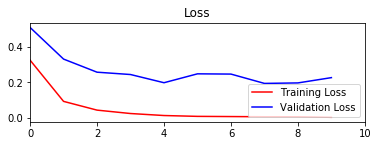

In [10]:
# From forum post https://discussions.udacity.com/t/looking-for-a-bit-of-guidance-on-project-2/232468/26?u=swarooph.nirmal

loss_plot = plt.subplot(2,1,1)
loss_plot.set_title('Loss')
loss_plot.plot(train_loss_history, 'r', label='Training Loss')
loss_plot.plot(valid_loss_history, 'b', label='Validation Loss')
loss_plot.set_xlim([0, EPOCHS])
loss_plot.legend(loc=4)

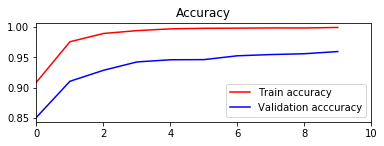

In [11]:
# From https://discussions.udacity.com/t/looking-for-a-bit-of-guidance-on-project-2/232468/26?u=swarooph.nirmal

accuracy_plot = plt.subplot(2,1,1)
accuracy_plot.set_title('Accuracy')
accuracy_plot.plot(train_accuracy_history, 'r', label='Train accuracy')
accuracy_plot.plot(validation_accuracy_history, 'b', label='Validation acccuracy')
accuracy_plot.set_xlim([0, EPOCHS])
accuracy_plot.legend(loc=4)

## Caclulate test data accuracy 

In [12]:
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.

# Resetting pointer of train data set to normalized dataset 
X_test = X_test_normalized

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    train_loss,test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.949


# Overal approach 

- Made me familiar with the data types and structures used
- I zero meaned the pixel values per channel like it was proposed - leaved further data processing and agumentation to later improvements
- Adapted the LeNet architecture to take three channel images and classify 43 sign classes 
- Run some experiments with the LeNet architecture using different learning rates, not normalized and normalized images
- As accuracy does not achieved a minimum of 0.93 I proceeded with another architecture
- I built the architecture proposed by the paper http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf using equivalent spatial dimensions like in the LeNet ConvLayers but with higher depth of the filters
- Run some experiments with the LeNet architecture using different learning rates, not normalized and normalized images
- As accuracy does not rise further than 0.7 - 0.85 I decided to made me familiar with tensorboard https://www.tensorflow.org/get_started/summaries_and_tensorboard to be able to plot network graphs and weights, biases and activation development during training in hope to see whats wrong
- Fixed a bug in my network found in the graph plot
- Additionally I added dropout to the connected layers with probability of 0.5 to achieve better generalization of the model
- Again run some experiments on LeCun architecture using different learning rates, not normalized and normalized images, batch size and drop out probability


## Final results summary 

All in all I struggled with the accuracy of my ConvNets to meet the desired accuracy until

- I fixed a minor bug using Tensorboard to "debug" my ConvNet
- I added dropouts to my network in addition 
- with a zero meaned dataset 

The regularization achieved by the dropout seems to work. Now the validation accuracy boosted up to 0.960 after 10 Epochs.

My final model results were:
* training set accuracy of 100%
* validation set accuracy of 96.0% 
* test set accuracy of 94.9% 

By using:
- My 2-stage LeCunNet model based on the proposed paper 
- AdamOptimizer
- Cross entropy 
- Dropout with probability 50% in the fully connected layers 
- Learning rate of 0.001 
- Batch size of 128 

---

# Step 3: Test a Model on New Images



## Searching for images on the net 

I choose traffic signs with a very low sample size and some with a very high sample size in the database. I expect that some of the signs with low sample size are going to have problems to be classified.

<b>12 - priority road</b> 
This sign is very significant because of its yellow color and diagonal edges and it is one of the signs with many samples in the database. I expect that this sign is classified correctly.


<b>14 - stop</b>
The stop also consists of many edges in different directions. Additionally the text on the sign may give additional edge information, if it is not too small so that it disappears in the noise. Because it belongs to one of the smallest samples, I am curious if it is going to be classified correctly.

<b>15 - no vehicle</b>
The no vehicle sign consists only of a red circle and belongs to the classes with the lowest sample size. I am expecting problems with the classification of this sign.

<b>17 - no entry</b>
The no entry sign belongs to the round signs and is the only sign with a filled red background which could help the classification. Classification could be difficult because it has not very much useful edges except the white bar in the middle. Additionally it has one of the smallest sample sizes in the database. Classification maybe difficult.

<b>22 - bumpy road</b> 
The bumpy road sign belongs to the signs with the "attention triangle" which represent multiple classes of the dataset. I am courious if it is going to be confused with some other "attention" traffic sign, because they differ only through the black pictogram inside the triangle. It belongs to one of the biggest sample sizes in the database.

<b>33 - turn right ahead</b> 
Additionally I am using a blue sign with a small sample size in the database. Is it going to be confused with another blue class with higher samlpe size like the "Go straigt or left"?

## Load and Output the Images

[[[159 154 143]
  [165 161 151]
  [173 168 156]
  ..., 
  [180 180 176]
  [194 190 182]
  [196 191 184]]

 [[176 169 156]
  [178 170 159]
  [179 170 158]
  ..., 
  [196 195 194]
  [207 202 200]
  [205 202 199]]

 [[173 166 152]
  [170 162 149]
  [166 157 144]
  ..., 
  [207 207 208]
  [212 210 211]
  [208 207 206]]

 ..., 
 [[166 161 147]
  [170 163 151]
  [174 167 152]
  ..., 
  [ 58  58  47]
  [ 47  46  33]
  [ 38  36  23]]

 [[165 160 146]
  [171 164 152]
  [175 168 155]
  ..., 
  [ 64  64  54]
  [ 48  47  34]
  [ 38  36  22]]

 [[165 159 145]
  [172 165 152]
  [175 168 155]
  ..., 
  [ 67  68  58]
  [ 51  49  37]
  [ 42  38  26]]]
[[[-0.22104799  0.25825962  0.0166683 ]
  [ 0.02396714  0.38238493  0.14962514]
  [ 0.35065398  0.50651024  0.23272316]
  ..., 
  [ 0.63650496  0.71929649  0.56511527]
  [ 1.20820693  0.89661837  0.6648329 ]
  [ 1.28987864  0.91435056  0.69807211]]

 [[ 0.47316154  0.52424243  0.23272316]
  [ 0.55483325  0.54197462  0.28258198]
  [ 0.59566911  0.54197462 

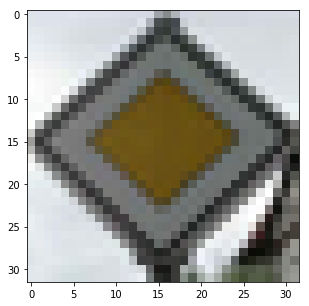

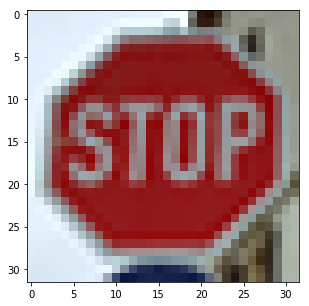

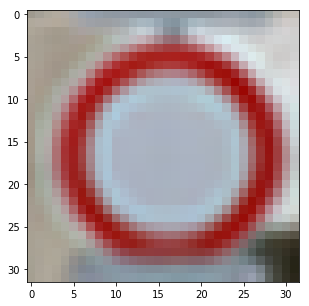

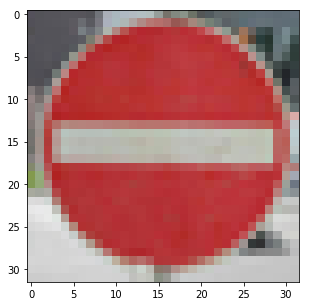

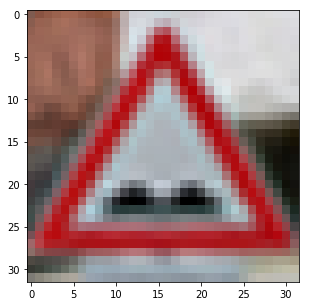

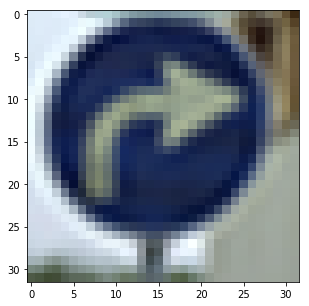

In [13]:
### Load the images and plot them here.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.

import glob
import cv2

# Getting the image paths
sorted_sign_images = sorted(glob.glob('./new_signs/*.png'))
# Defining the class of the choosen images by hand 
labels = np.array([12, 14, 15, 17, 22, 33])

# Defining an emtpy list that is going to take the images   
X_test_new = []

# Iterating through found image paths 
for sign_image in sorted_sign_images:
    # I read in the forum that open cv is loading images in BGR format 
    # So I am converting it to RGB right away 
    image = cv2.cvtColor(cv2.imread(sign_image), cv2.COLOR_BGR2RGB)
    #print(image)
    X_test_new.append(image)
    # Show the loaded image 
    plt.figure(figsize=(5,5))
    plt.imshow(image)

print(X_test_new[2])

X_test_new_normalized = np.empty((6,32,32,3), dtype=np.float)

for i in range(len(X_test_new)):
    X_test_new_normalized[i] = normalize_images(X_test_new[i])

# Take a look at the data to verify that channels are normalized 
print(X_test_new_normalized[2])    
print(X_test_new_normalized.shape)
    


## Performance on new images

### Predict the Sign Type for Each Image

I am using the proposed tf.nn.top_k proposed further below to access the top prediction of a sign. Later it is used to get the top 5 predicitions.  

In [14]:
### Run the predictions here and use the model to output the prediction for each image.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    logit_values = sess.run(logits, feed_dict={x: X_test_new_normalized, keep_prob: 1.0})    
    probabilities = tf.nn.softmax(logit_values)
    top_prediction = tf.nn.top_k(probabilities, k=1)
    preditced_signs = sess.run(top_prediction)

print("Predicted Signs: ", preditced_signs)

Predicted Signs:  TopKV2(values=array([[ 1.        ],
       [ 0.99999988],
       [ 1.        ],
       [ 1.        ],
       [ 0.99994314],
       [ 0.98279297]], dtype=float32), indices=array([[12],
       [14],
       [15],
       [17],
       [22],
       [33]], dtype=int32))


### Result

Looking at the list of my choosen traffic signs

- 12 - priority road 
- 14 - stop
- 15 - no vehicles  
- 17 - no entry 
- 22 - bumpy road 
- 33 - turn right 

All of the signs are correctly recognized by the net: 12, 14, 15, 17, 22, 33 with 100% probability.

The result does not reflect my expectations about which sign is going to have problems on classification. Also the traffic signs with a very small sample size are classified correctly. 


### Analyse Performance 

In [15]:
# Using same syntax as before only with new normalized datasets and labels 
# Accuracy on whole new test set 
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    train_loss,test_accuracy = evaluate(X_test_new_normalized, labels)
    print("Total Accuracy on new test set = {:.3f}".format(test_accuracy))

Total Accuracy on new test set = 1.000


With all traffic signs classified correctly with almost 100% probability, the network performs better on the new test images than on the test and validation set. 

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

In [25]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

# Now I am using the k=5 to get the top 5 classified images 
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    probability = sess.run(tf.nn.softmax(logits), feed_dict={x: X_test_new_normalized, keep_prob: 1.0})    
    top_five_signs = tf.nn.top_k(probability, k=5)
    result_top_five = sess.run(top_five_signs)

print(result_top_five)

TopKV2(values=array([[  1.00000000e+00,   3.37788087e-12,   2.90690432e-12,
          2.63444713e-12,   8.24009372e-13],
       [  9.99999881e-01,   8.28213729e-08,   2.61107425e-09,
          1.29338373e-10,   8.35562036e-11],
       [  1.00000000e+00,   9.15346909e-10,   3.29199168e-10,
          1.26811530e-11,   8.37102609e-12],
       [  1.00000000e+00,   7.26084831e-18,   9.52481415e-19,
          1.17232649e-20,   1.97316264e-23],
       [  9.99943137e-01,   5.69141012e-05,   9.62997126e-10,
          1.90757098e-11,   2.10204835e-12],
       [  9.82792974e-01,   1.68811101e-02,   1.05742794e-04,
          9.47941007e-05,   4.77419853e-05]], dtype=float32), indices=array([[12, 32, 17, 35, 26],
       [14, 17,  5,  3, 25],
       [15,  5,  2,  9,  1],
       [17, 14, 30, 13, 25],
       [22, 29, 15, 31,  8],
       [33, 35, 42, 10, 34]], dtype=int32))


As the first four signs are classified with 100% probability I am only going to look at the last classified sign:

Looking at the vector

...  [  9.82792974e-01,   1.68811101e-02,   1.05742794e-04,
          9.47941007e-05,   4.77419853e-05]], dtype=float32), indices=ar
   
and 
 ... [33, 35, 42, 10, 34]], dtype=int32))
 
I can see that the classification probabilities are as follows: 

| Class         		|     Description    | Probability %  	        					| 
|:-------:|:--------------------:|:-----------------:| 
| 35	  |	Ahead only			| 1.8|
| 33	  | Turn right ahead	| 98.2| 

The turn right ahead sign is tiny little bit misleaded by the ahed only sign, which is also a blue sign with an arrow in it. So my expectations was correct about the blue signs. 


---

# Step 4 (Optional): Visualize the Neural Network's State with Test Images


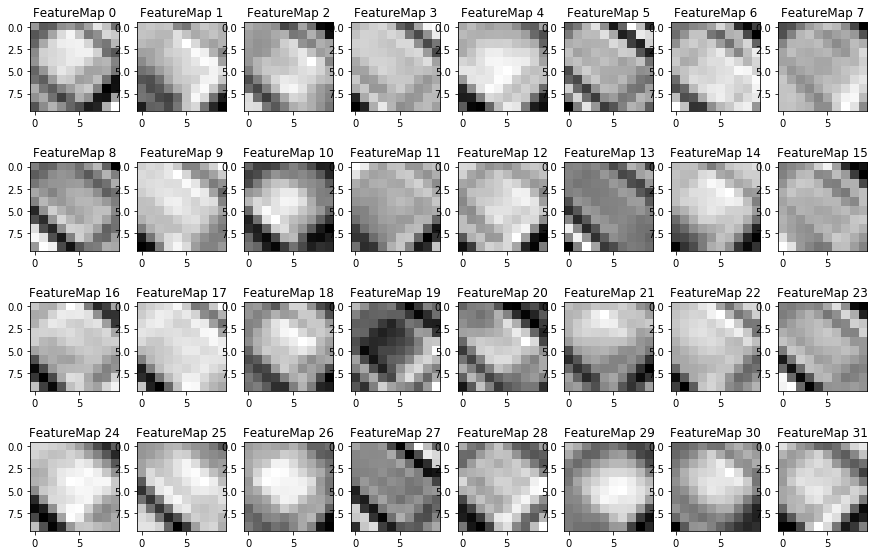

In [17]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    # Because of my scope names I have to use Scopename/Layername to get the tensors 
    outputFeatureMap(X_test_new_normalized,sess.graph.get_tensor_by_name('ConvL1/ConvL1:0'))
    outputFeatureMap(X_test_new_normalized,sess.graph.get_tensor_by_name('ConvL2/ConvL2:0'))            
            
        

I think my net is likes the diagonal edges of the "main road" traffic sign. Additionally the blob like feature maps e.g. 26, 29, 30 may correspond to the color of the traffic sign. 

---

# Conclusion 

I learned a lot about working with CNNs in this project and there is much more that can be done to further increase the accuracy of the classification like: 

- Further data processing like grayscale conversion 
- Data augmentation: By applying affine transformations (translate, rotate, scale and shear), adding noise or corped image segments the database can be enlarged
- Adding L2 regularization to further improve generalization of the network 
- Trying Xavier initialization of weights
- Try batch normalization 
- Further experiments with different architectures 
- Examine network performance like it is proposed by optional udacity task in respect to precision and recall performance 
- Test automation using Tensorboard summarizer to be able to compare a lot of configurations and architecture changes like it is shown here https://youtu.be/eBbEDRsCmv4?t=834 which seems to be awesome  

